In [29]:
import os
os.chdir("D:/Codes/Python/Machine-Learning/")

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [31]:
df_income = pd.read_csv("./Data/income.csv")
df_income

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


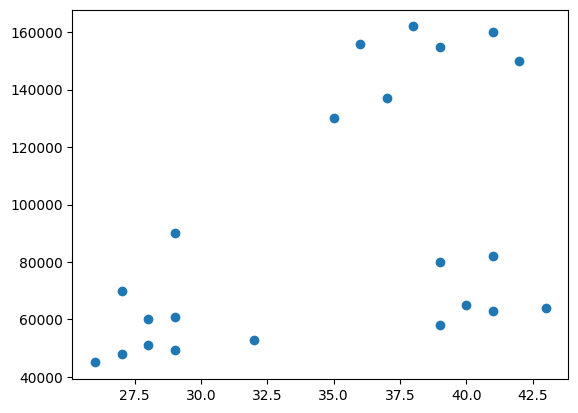

In [32]:
plt.scatter(df_income.Age, df_income[['Income($)']])

In [33]:
scaler = MinMaxScaler()

In [34]:
df_income.Age = scaler.fit_transform(df_income[['Age']])
df_income['Income($)'] = scaler.fit_transform(df_income[['Income($)']])

In [35]:
df_income

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


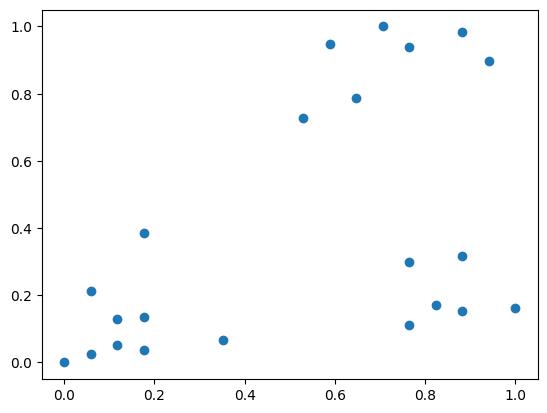

In [36]:
plt.scatter(df_income.Age, df_income[['Income($)']])

In [37]:
km = KMeans(n_clusters=3)

In [38]:
y_pred = km.fit_predict(df_income[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [39]:
df_income['cluster'] = y_pred
df_income

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


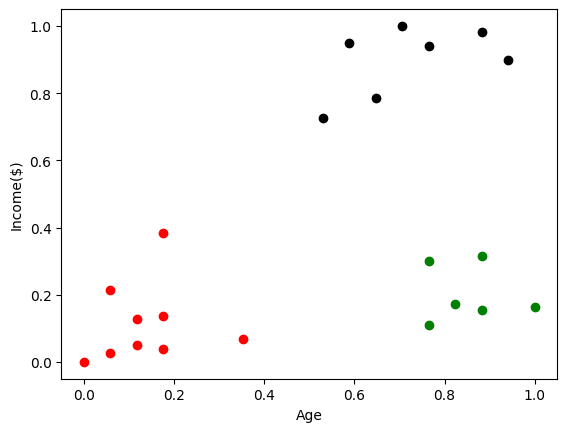

In [40]:
plt.scatter(df_income[df_income.cluster==0].Age, df_income[df_income.cluster==0][['Income($)']], color='red')
plt.scatter(df_income[df_income.cluster==1].Age, df_income[df_income.cluster==1][['Income($)']], color='green')
plt.scatter(df_income[df_income.cluster==2].Age, df_income[df_income.cluster==2][['Income($)']], color='black')

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

Plotting Cluster Centers 

In [41]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

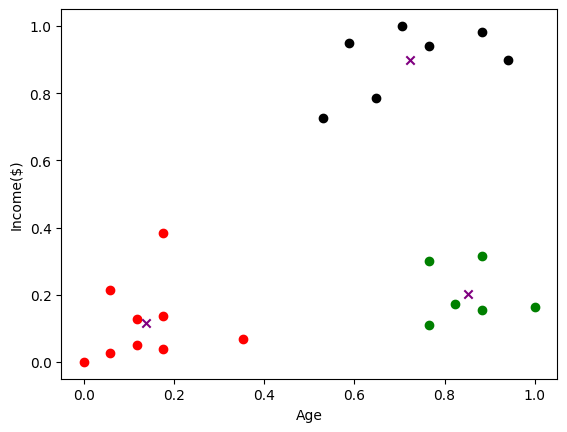

In [42]:
plt.scatter(df_income[df_income.cluster==0].Age, df_income[df_income.cluster==0][['Income($)']], color='red')
plt.scatter(df_income[df_income.cluster==1].Age, df_income[df_income.cluster==1][['Income($)']], color='green')
plt.scatter(df_income[df_income.cluster==2].Age, df_income[df_income.cluster==2][['Income($)']], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = "purple", marker="x")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [43]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df_income[['Age','Income($)']])
    sse.append(km.inertia_)   # inertia_ is used for calculating the Sum of Sq. Error

Plotting an Elbow plot to determine the no. of clusters in a dataset

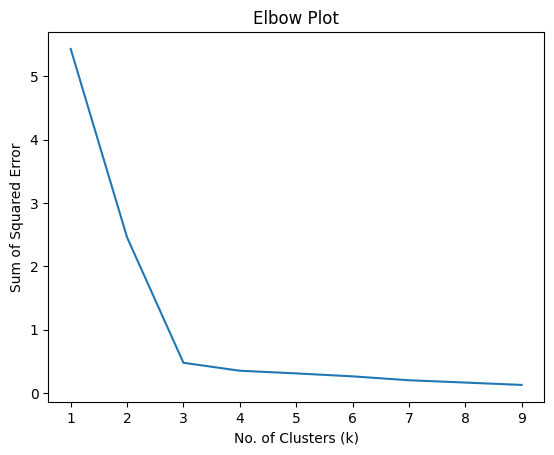

In [44]:
plt.plot([k for k in range(1,10)], sse)
plt.title("Elbow Plot")
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Sum of Squared Error")
plt.show()